# Проект. Анализ спроса авиакомпании

Имеется российская авиакомпания F9, выполняющая внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

В ходе проекта предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

### Инструкция по выполнению проекта

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

## 1. Аналитика

### 1.1 Изучение информации о данных

Импортируем необходимые модули и библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Прочитаем данные и сохраним их в переменные.

In [3]:
data_1 = pd.read_csv('/datasets/query_1.csv')
data_2 = pd.read_csv('/datasets/query_3.csv')
data_3 = pd.read_csv('/datasets/query_last.csv')

Посмотрим на информацию о данных.

In [4]:
names = [data_1, data_2, data_3]
for i, k in enumerate(names):
    print("DATA_" + str(i + 1))
    print(k.head(), '\n')
    print(k.info(), '\n')
    print('Наличие дубликатов:', k.duplicated().sum(), '\n')
    print(k.describe(), '\n\n')

DATA_1
             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
3   Boeing 767-300             600
4   Boeing 777-300             300 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None 

Наличие дубликатов: 0 

       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000 


DATA_2
          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city              

* В первом и втором датасете с типом данных и наличием пропусков проблем нет. В третьем датасете можно поменять тип данных столбца *'festival_week'*, но необязательно так как эти значения не будут использоваться. Наличие пропусков также не повлияет на решение задач проекта. В целом с данными все в порядке и можно приступать к анализу. Дубликаты также отсутствуют.

------

### 1.2 Построение таблицы и графиков

Выберем топ-10 городов по количеству рейсов.

In [5]:
data_2.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим график модели самолетов и количество рейсов.

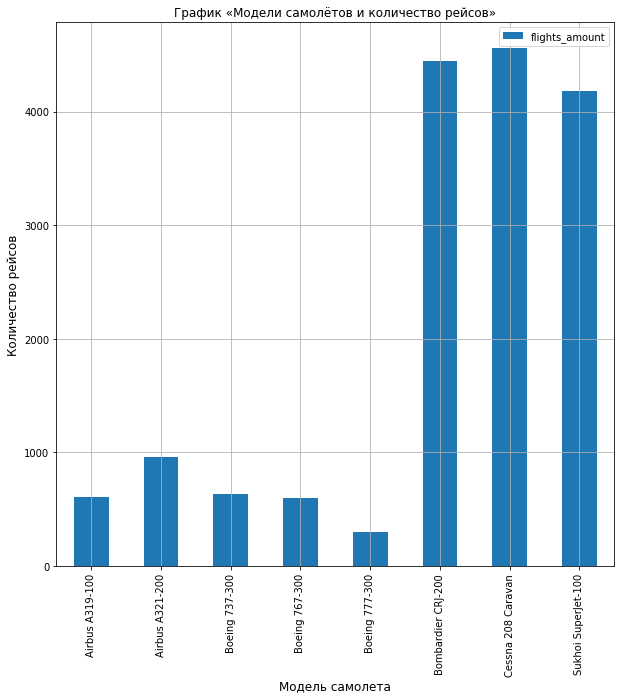

In [6]:
data_1.plot(x='model', y='flights_amount', kind='bar', grid=True, figsize=(10,10))
plt.title('График «Модели самолётов и количество рейсов»', fontsize='large');
plt.ylabel('Количество рейсов', fontsize='large');
plt.xlabel('Модель самолета', fontsize='large');

* Количество рейсов в сентябре 2018 года самолетов компаний Bombardier, Cessna и Sukhoi превышает количество рейсов самолетов компаний Airbus и Boeing больше, чем в 4 раза. Относительно самолетов Boeing, можно предположить, что они меньше используются, потому что не нужна такая большая вместимость пассажиров, так как это региональные авиаперевозки. Самолеты компаний Bombardier, Cessna и Sukhoi - это самолеты для региональных перевозок, отсюда такое большое количество рейсов. Самолеты компании Airbus, возможно, больше нацелены на международные авиаперевозки.

Построим график города и количество рейсов. В качестве типа графика выберем гистограмму, так образом можно будет посмотреть на распределение среднего колчества рейсов в день.

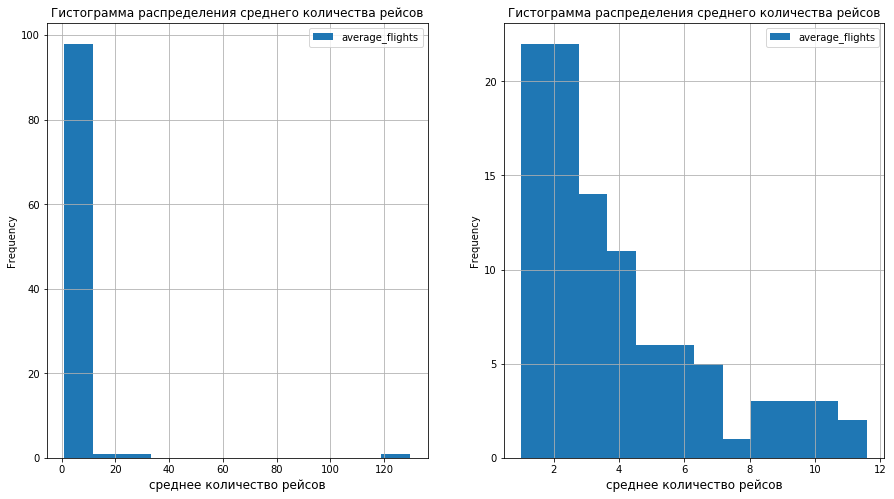

       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
2.5%          1.000000
25%           2.000000
50%           3.000000
75%           5.870968
97.5%        14.451613
max         129.774194


In [7]:
# гистограмма без удаления выбросов
data_2.plot(kind='hist', bins=12, grid=True, figsize=(15,8), ax = plt.subplot(1,2,1))
plt.title('Гистограмма распределения среднего количества рейсов', fontsize='large');
plt.xlabel('среднее количество рейсов', fontsize='large');

# гистограмма с удаление выбросов
(data_2
 .query('city != "Москва" and city != "Новосибирск" and city != "Санкт-Петербург"')
 .plot(kind='hist', bins=12, grid=True, figsize=(15,8), ax = plt.subplot(1,2,2))
)
plt.title('Гистограмма распределения среднего количества рейсов', fontsize='large');
plt.xlabel('среднее количество рейсов', fontsize='large');

plt.show()

# показываем статистики выборки, в частности процентили 2,5% и 97.5%, чтобы убрать выбросы
print(data_2.describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975]))

* Пришлось построить второй график, так как по первой гистограмме можно сказать, что имеются в выборке имеются выбросы. Для удаления выбросов использовалось значение среднего количества рейсов, равное процентилю 97.5% или 14.45. И исходя из таблицы "топ-10 городов по количеству рейсов", выбросами являются города Москва, Санкт-Петербург и Новосибирск. По второй гистограмме можно сказать что, в основном в сентябре в каждый город прибывает от 1 до 5-6 самолетов.  

Гостроим график топ-10 городов и среднее количество рейсов. Используем столбчатый тип графика.

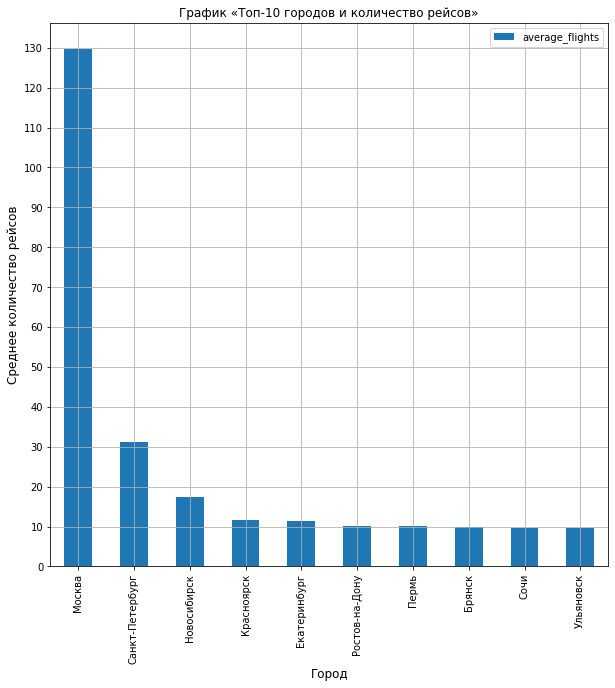

In [8]:
(data_2
 .sort_values(by='average_flights', ascending=False).head(10)
 .plot(x='city', y='average_flights', kind='bar', grid=True, figsize=(10,10)))
plt.title('График «Топ-10 городов и количество рейсов»', fontsize='large');
plt.ylabel('Среднее количество рейсов', fontsize='large');
plt.xlabel('Город', fontsize='large');
plt.yticks(range(0, 140, 10));

* Можно сказать, что Москва - абсолютный лидер по количеству прибывающих в сентябре рейсов. Количество рейсов в Санкт-Петербурге и Новосибирске меньше в 4 и 6 раз соответственно.

------

## 2. Проверка гипотезы

Посмотрим на таблицу билетов, недель и фестивалей.

In [9]:
data_3

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

* **Нулевая гипотеза** - средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время.
* **Альтернативная гипотеза** - средний спрос на билеты во время фестивалей не равен среднему спросу на билеты в обычное время.

Для проверки гипотезы создадим необходимые выборки и посчитаем их дисперсии.

In [10]:
festivals = data_3[data_3['festival_week'].isna() != True]['ticket_amount']
not_festivals = data_3[data_3['festival_week'].isna() == True]['ticket_amount']

print('Дисперсия выборки для билетов во время фестиваля', np.var(festivals))
print('Дисперсия выборки для билетов без фестиваля', np.var(not_festivals))

Дисперсия выборки для билетов во время фестиваля 12998464.888888888
Дисперсия выборки для билетов без фестиваля 14694.408163265309


Посмотрим на распределения получившихся выборок.

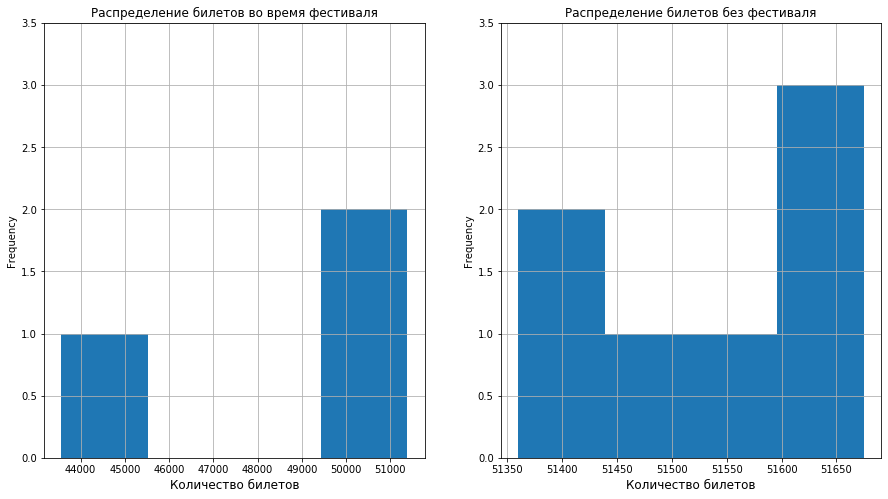

In [11]:
festivals.plot(kind='hist', bins=4, ax = plt.subplot(1,2,1), grid=True, figsize=(15,8), ylim=(0,3.5))
plt.title('Распределение билетов во время фестиваля', fontsize='large');
plt.xlabel('Количество билетов', fontsize='large');

not_festivals.plot(kind='hist', bins=4, ax = plt.subplot(1,2,2), grid=True, ylim=(0,3.5), figsize=(15,8))
plt.title('Распределение билетов без фестиваля', fontsize='large');
plt.xlabel('Количество билетов', fontsize='large');

Используем `ttest_ind`.

In [12]:
# Примем общепринятое пороговое значение 5%
alpha = .05

# Для проверки гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var)
# аргумент equal_var приравняем False, так как дисперсии выборок не равны
results = st.ttest_ind(festivals, not_festivals, equal_var = False)
print('p-значение:', results.pvalue)

# прописываем условия вывода результата проверки гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


* Результат: не отвергаем нулевую гипотезу.

Таким образом, статистический тест показал, что спрос на билеты во время прохождения фестивалей в городе Москва не отличается от спроса на билеты, когда фестивалей нет.

------

## Выводы

* В ходе проекта было проанализировано какие модели самолетов чаще используются для региональных перевозок. Получена информация о том, сколько, в среднем, прибывает самолетов в день в каждый город в течение одного месяца.

* Также, было показано что спрос на билеты во время прохождения фестивалей в городе Москва не отличается от спроса на билеты, когда фестивалей не проходит. Тут еще надо сказать, что речь идет о Москве, и в нем количество рейсов прибывающих в город в несколько раз превышает количество рейсов в других городах. И на этом фоне влияния прохождений отдельных фестивалей незаметно. Если бы в качестве исследования был выбран любой другой город, то, скорее всего, спрос на билеты во время прохождения фестиваля увеличился.

------